In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../datasets/tracks_cleaned.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526305 entries, 0 to 526304
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                526305 non-null  object 
 1   name              526304 non-null  object 
 2   popularity        526305 non-null  int64  
 3   duration_ms       526305 non-null  int64  
 4   explicit          526305 non-null  int64  
 5   artists           526305 non-null  object 
 6   id_artists        526305 non-null  object 
 7   release_date      526305 non-null  object 
 8   danceability      526305 non-null  float64
 9   energy            526305 non-null  float64
 10  key               526305 non-null  int64  
 11  loudness          526305 non-null  float64
 12  mode              526305 non-null  int64  
 13  speechiness       526305 non-null  float64
 14  acousticness      526305 non-null  float64
 15  instrumentalness  526305 non-null  float64
 16  liveness          52

In [4]:
df.shape

(526305, 20)

In [5]:
df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [6]:
print(df.isnull().sum())

id                  0
name                1
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64


In [7]:
df_numeric = df.copy()

In [8]:
df_numeric = df_numeric.drop(columns = ['name', 'id', 'artists', 'id_artists'])

In [9]:
df_numeric

,popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,100,198082,1,2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.3210,0.000000,0.4200,0.464,90.030,4
1,99,242014,1,2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.7210,0.000013,0.1050,0.132,143.874,4
2,98,132780,0,2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.1750,0.000000,0.1500,0.472,149.996,4
3,97,160191,0,2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.1120,0.000000,0.2030,0.553,83.970,4
4,97,215627,1,2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.0212,0.000012,0.5430,0.644,118.051,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526300,0,181577,0,1932,0.645,0.381,2,-12.496,0,0.0657,0.9840,0.056600,0.0645,0.763,165.390,4
526301,0,197377,0,1932,0.549,0.437,3,-5.819,1,0.0410,0.8930,0.075900,0.1590,0.327,126.563,4
526302,0,185674,0,1932,0.564,0.185,8,-9.621,1,0.0379,0.9800,0.000000,0.0949,0.480,119.479,4
526303,0,171935,0,1932,0.758,0.524,11,-3.740,1,0.0737,0.9940,0.850000,0.1980,0.931,93.801,4


In [10]:
df_numeric['release_date'] = pd.to_datetime(df_numeric['release_date'], format='mixed')

In [72]:
df_numeric['release_date'].max()

Timestamp('2021-04-16 00:00:00')

In [11]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526305 entries, 0 to 526304
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   popularity        526305 non-null  int64         
 1   duration_ms       526305 non-null  int64         
 2   explicit          526305 non-null  int64         
 3   release_date      526305 non-null  datetime64[ns]
 4   danceability      526305 non-null  float64       
 5   energy            526305 non-null  float64       
 6   key               526305 non-null  int64         
 7   loudness          526305 non-null  float64       
 8   mode              526305 non-null  int64         
 9   speechiness       526305 non-null  float64       
 10  acousticness      526305 non-null  float64       
 11  instrumentalness  526305 non-null  float64       
 12  liveness          526305 non-null  float64       
 13  valence           526305 non-null  float64       
 14  temp

In [12]:
print(df_numeric.isnull().sum())

popularity          0
duration_ms         0
explicit            0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64


In [13]:
filtered_df = df_numeric[df_numeric['release_date'].between('1990-01-01', '2021-12-31')]

In [14]:
filtered_df = filtered_df.sort_values(by = 'popularity', ascending = False)

In [15]:
filtered_df

,popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,100,198082,1,2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.321000,0.000000,0.420,0.4640,90.030,4
1,99,242014,1,2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.721000,0.000013,0.105,0.1320,143.874,4
2,98,132780,0,2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.175000,0.000000,0.150,0.4720,149.996,4
3,97,160191,0,2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.112000,0.000000,0.203,0.5530,83.970,4
4,97,215627,1,2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.021200,0.000012,0.543,0.6440,118.051,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502826,0,451511,0,2016-12-07,0.746,0.859,1,-9.314,0,0.0793,0.000062,0.856000,0.132,0.0354,145.019,4
502825,0,106909,0,2017-01-03,0.520,0.990,7,-3.867,0,0.1680,0.052800,0.000021,0.376,0.2730,125.747,4
502824,0,134952,0,2015-12-17,0.713,0.990,0,-4.201,1,0.1020,0.061100,0.001550,0.898,0.5610,128.009,4
502823,0,161840,0,2020-06-25,0.473,0.972,4,-4.092,0,0.0649,0.003630,0.000241,0.173,0.4900,119.946,4


In [16]:
filtered_df = filtered_df.reset_index()

In [17]:
filtered_df = filtered_df.drop(columns  = 'index')

In [18]:
filtered_df

,popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,100,198082,1,2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.321000,0.000000,0.420,0.4640,90.030,4
1,99,242014,1,2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.721000,0.000013,0.105,0.1320,143.874,4
2,98,132780,0,2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.175000,0.000000,0.150,0.4720,149.996,4
3,97,160191,0,2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.112000,0.000000,0.203,0.5530,83.970,4
4,97,215627,1,2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.021200,0.000012,0.543,0.6440,118.051,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287802,0,451511,0,2016-12-07,0.746,0.859,1,-9.314,0,0.0793,0.000062,0.856000,0.132,0.0354,145.019,4
287803,0,106909,0,2017-01-03,0.520,0.990,7,-3.867,0,0.1680,0.052800,0.000021,0.376,0.2730,125.747,4
287804,0,134952,0,2015-12-17,0.713,0.990,0,-4.201,1,0.1020,0.061100,0.001550,0.898,0.5610,128.009,4
287805,0,161840,0,2020-06-25,0.473,0.972,4,-4.092,0,0.0649,0.003630,0.000241,0.173,0.4900,119.946,4


In [19]:
filtered_df = filtered_df[filtered_df['popularity'] > 0]

In [20]:
filtered_df

,popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,100,198082,1,2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.321000,0.000000,0.420,0.4640,90.030,4
1,99,242014,1,2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.721000,0.000013,0.105,0.1320,143.874,4
2,98,132780,0,2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.175000,0.000000,0.150,0.4720,149.996,4
3,97,160191,0,2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.112000,0.000000,0.203,0.5530,83.970,4
4,97,215627,1,2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.021200,0.000012,0.543,0.6440,118.051,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280176,1,230400,0,2018-11-29,0.496,0.950,4,-7.519,0,0.0450,0.008950,0.879000,0.179,0.5040,125.003,4
280177,1,192990,0,2018-10-19,0.324,0.717,6,-9.873,0,0.0388,0.242000,0.930000,0.136,0.9620,200.062,4
280178,1,229651,0,2012-12-14,0.823,0.462,4,-6.824,1,0.0370,0.027700,0.000107,0.108,0.4760,124.023,4
280179,1,265846,0,2018-11-29,0.655,0.914,2,-6.533,1,0.0476,0.000056,0.515000,0.118,0.0329,129.989,4


## EDA Section

In [22]:
corr_matrix = filtered_df.corr()

In [23]:
corr_pairs = corr_matrix.unstack()
pos_corr = corr_pairs[(corr_pairs >= 0.5) & (corr_pairs < 1)]
print("Strong Positive Correlation: \n", pos_corr)

neg_corr = corr_pairs[(corr_pairs <= -0.5) & (corr_pairs > -1)]
print("\nStrong Negative Correlation : \n", neg_corr)

Strong Positive Correlation: 
 energy    loudness    0.730851
loudness  energy      0.730851
dtype: float64

Strong Negative Correlation : 
 energy        acousticness   -0.676269
acousticness  energy         -0.676269
dtype: float64


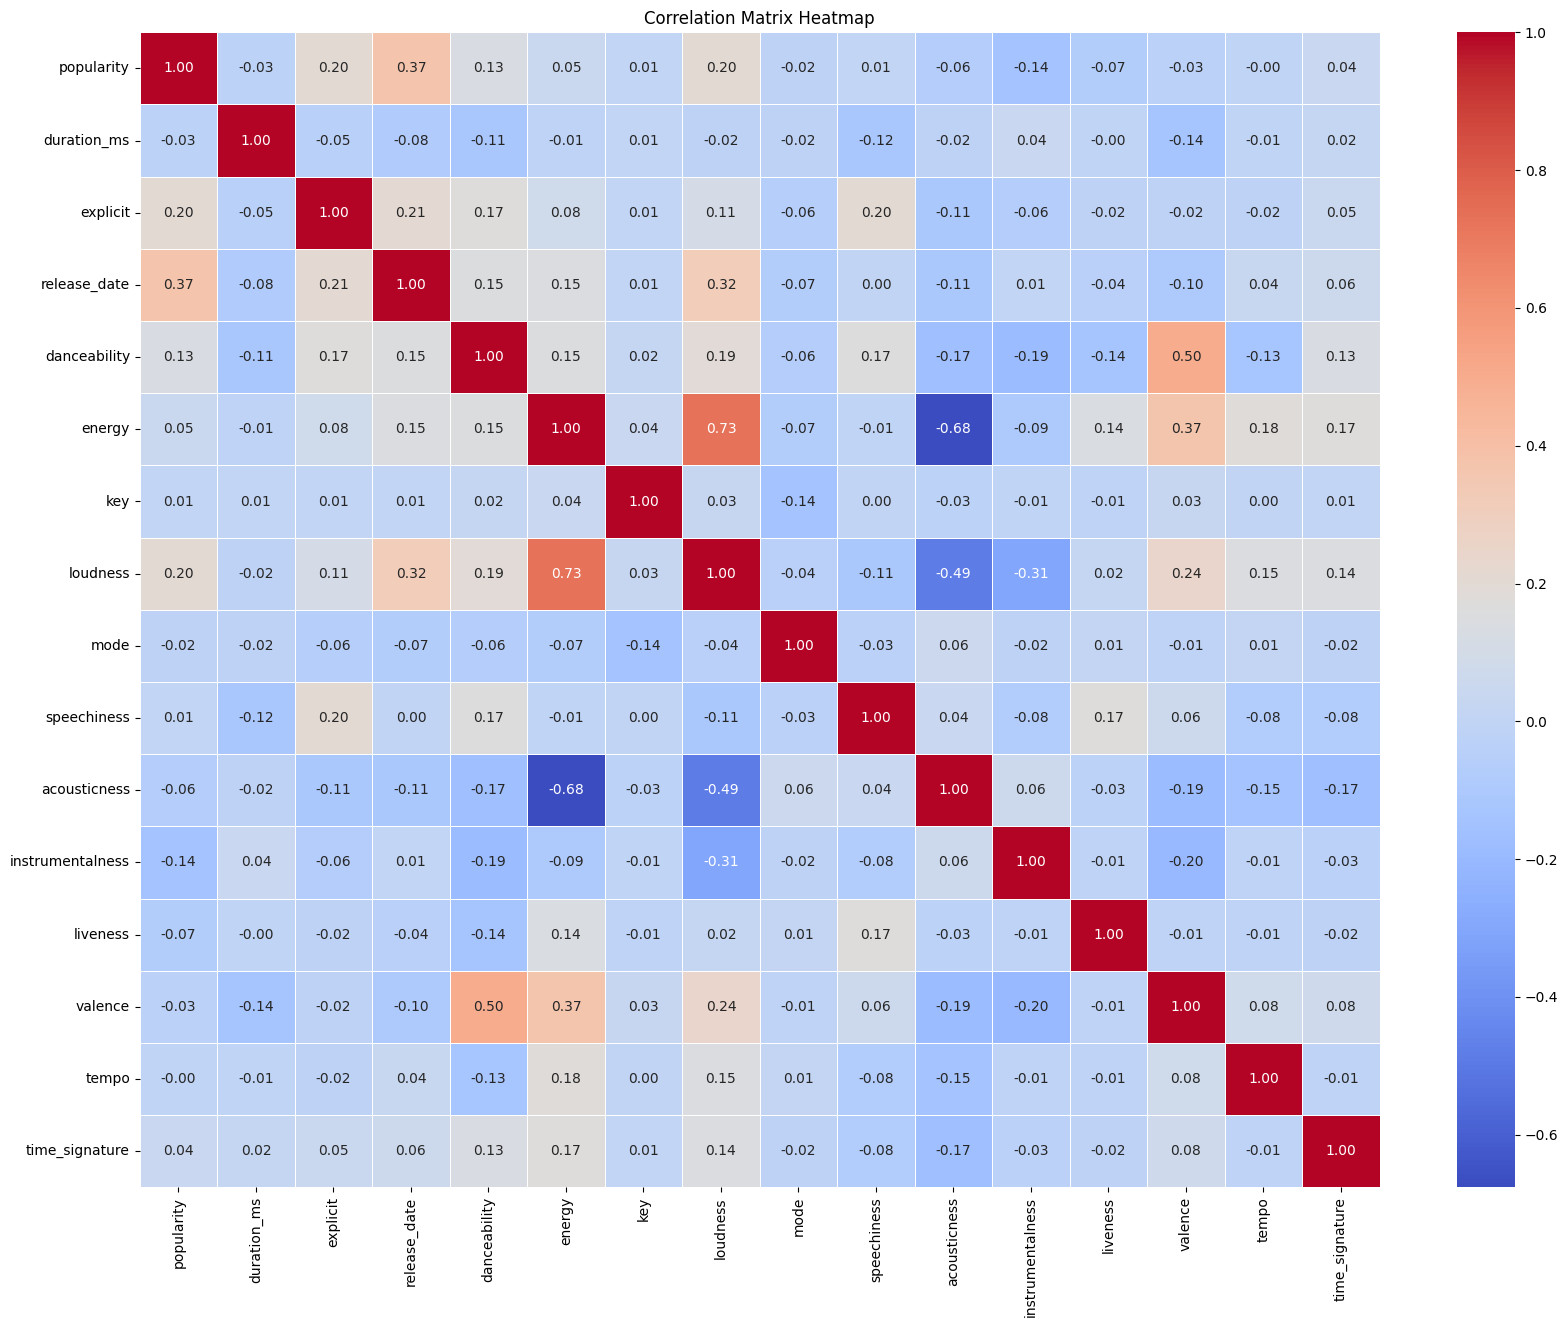

In [24]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,
            annot= True,
            cmap='coolwarm',
            fmt = '.2f',
            linewidths = .5
            )
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Source - https://stackoverflow.com/a/50774730
# Posted by ImportanceOfBeingErnest, modified by community. See post 'Timeline' for change history
# Retrieved 2026-02-15, License - CC BY-SA 4.0
plt.figure(figsize=(20,15))
for i, col in enumerate(filtered_df.columns, 1):
    plt.subplot(4,4,i)
    sns.histplot(filtered_df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

In [21]:
filtered_df['release_year'] = pd.to_datetime(filtered_df['release_date'], errors='coerce').dt.year

/var/folders/sz/_mlq7slj15vg1f70zg680jwr0000gn/T/ipykernel_33096/2964616069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['release_year'] = pd.to_datetime(filtered_df['release_date'], errors='coerce').dt.year


In [22]:
filtered_df

,popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
0,100,198082,1,2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.321000,0.000000,0.420,0.4640,90.030,4,2021
1,99,242014,1,2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.721000,0.000013,0.105,0.1320,143.874,4,2021
2,98,132780,0,2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.175000,0.000000,0.150,0.4720,149.996,4,2021
3,97,160191,0,2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.112000,0.000000,0.203,0.5530,83.970,4,2020
4,97,215627,1,2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.021200,0.000012,0.543,0.6440,118.051,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280176,1,230400,0,2018-11-29,0.496,0.950,4,-7.519,0,0.0450,0.008950,0.879000,0.179,0.5040,125.003,4,2018
280177,1,192990,0,2018-10-19,0.324,0.717,6,-9.873,0,0.0388,0.242000,0.930000,0.136,0.9620,200.062,4,2018
280178,1,229651,0,2012-12-14,0.823,0.462,4,-6.824,1,0.0370,0.027700,0.000107,0.108,0.4760,124.023,4,2012
280179,1,265846,0,2018-11-29,0.655,0.914,2,-6.533,1,0.0476,0.000056,0.515000,0.118,0.0329,129.989,4,2018


In [23]:
filtered_df.columns

Index(['popularity', 'duration_ms', 'explicit', 'release_date', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'release_year'],
      dtype='object')

In [24]:
filtered_df = filtered_df.drop(columns = 'release_date')

<Axes: xlabel='popularity', ylabel='danceability'>

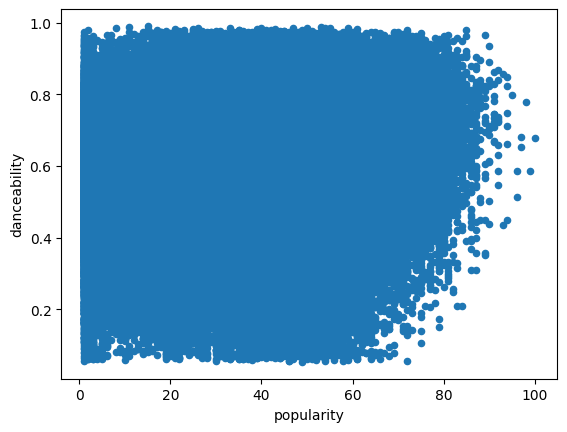

In [ ]:
filtered_df.plot.scatter(x='popularity', y='danceability')

<Axes: xlabel='popularity', ylabel='liveness'>

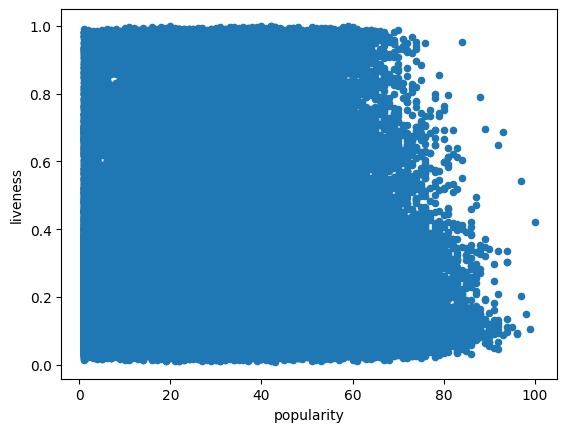

In [ ]:
filtered_df.plot.scatter(x='popularity', y='liveness')

<Axes: xlabel='popularity', ylabel='instrumentalness'>

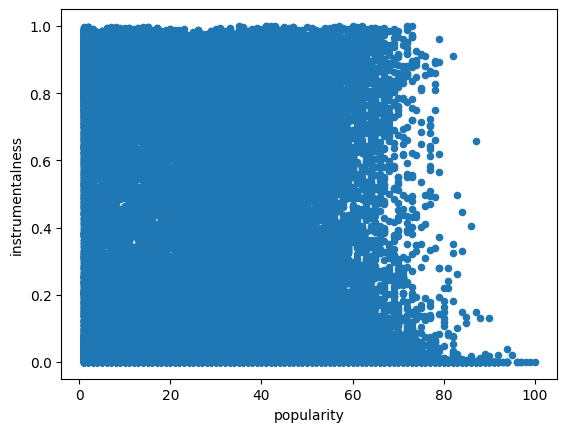

In [ ]:
filtered_df.plot.scatter(x='popularity', y='instrumentalness')

<Axes: xlabel='popularity', ylabel='valence'>

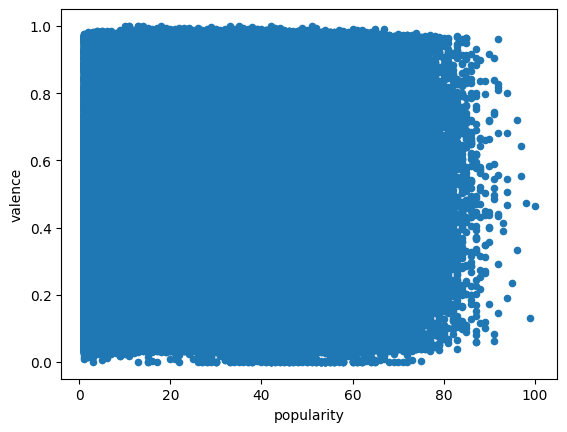

In [ ]:
filtered_df.plot.scatter(x='popularity', y='valence')

Text(0.5, 1.0, 'Popularity Distribution')

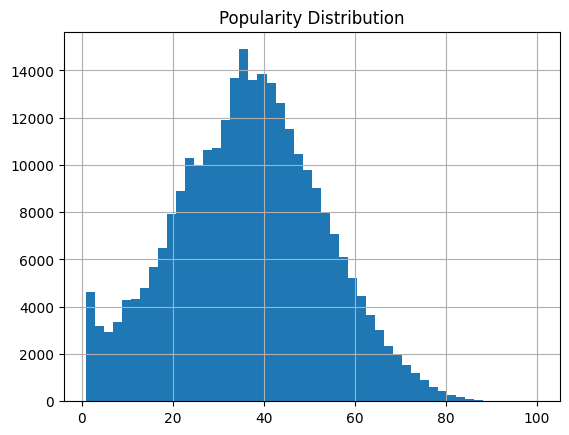

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_df['popularity'].hist(bins=50)
plt.title('Popularity Distribution')

In [ ]:
filtered_df['popularity'].describe()

count    280181.000000
mean         36.572355
std          16.358115
min           1.000000
25%          25.000000
50%          37.000000
75%          48.000000
max         100.000000
Name: popularity, dtype: float64

In [27]:
filtered_df2 = filtered_df.copy()

## Bucket Approach

In [28]:
bins = [0, 25, 50, 100]
labels = ['Low', 'Medium', 'High']
filtered_df2['popularity_bucket'] = pd.cut(filtered_df2['popularity'], bins=bins, labels=labels)
filtered_df2['popularity_bucket'].value_counts()

popularity_bucket
Medium    152267
Low        71748
High       56166
Name: count, dtype: int64

In [29]:
filtered_df2

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,popularity_bucket
0,100,198082,1,0.677,0.696,0,-6.181,1,0.1190,0.321000,0.000000,0.420,0.4640,90.030,4,2021,High
1,99,242014,1,0.585,0.436,10,-8.761,1,0.0601,0.721000,0.000013,0.105,0.1320,143.874,4,2021,High
2,98,132780,0,0.778,0.695,4,-6.865,0,0.0913,0.175000,0.000000,0.150,0.4720,149.996,4,2021,High
3,97,160191,0,0.653,0.524,11,-9.016,0,0.0502,0.112000,0.000000,0.203,0.5530,83.970,4,2020,High
4,97,215627,1,0.680,0.826,0,-5.487,1,0.0309,0.021200,0.000012,0.543,0.6440,118.051,4,2020,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280176,1,230400,0,0.496,0.950,4,-7.519,0,0.0450,0.008950,0.879000,0.179,0.5040,125.003,4,2018,Low
280177,1,192990,0,0.324,0.717,6,-9.873,0,0.0388,0.242000,0.930000,0.136,0.9620,200.062,4,2018,Low
280178,1,229651,0,0.823,0.462,4,-6.824,1,0.0370,0.027700,0.000107,0.108,0.4760,124.023,4,2012,Low
280179,1,265846,0,0.655,0.914,2,-6.533,1,0.0476,0.000056,0.515000,0.118,0.0329,129.989,4,2018,Low


#### One Hot Encode

In [30]:
# One hot encode catrgorical data 
categorical = ['key', 'mode', 'explicit']

log_transform = ['duration_ms', 'speechiness', 
                 'acousticness', 'instrumentalness', 'liveness']

continuous = ['danceability', 'energy', 'loudness', 
              'valence', 'tempo', 'release_year']

In [31]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
encoded = ohe.fit_transform(filtered_df2[['key', 'mode', 'explicit']])

In [32]:
df_encoded = pd.DataFrame(encoded, columns=ohe.get_feature_names_out())

In [33]:
df_encoded = df_encoded.reset_index()

In [34]:
filtered_df2 = filtered_df2.reset_index()

In [35]:
df_encoded

,index,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,explicit_0,explicit_1
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280176,280176,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
280177,280177,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
280178,280178,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
280179,280179,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [36]:
final_df = pd.merge(df_encoded, filtered_df2, on = 'index', how = 'inner') 

In [37]:
final_df.columns

Index(['index', 'key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6',
       'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'mode_0', 'mode_1',
       'explicit_0', 'explicit_1', 'popularity', 'duration_ms', 'explicit',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'release_year', 'popularity_bucket'],
      dtype='object')

In [38]:
final_df = final_df.drop(columns = ['index', 'mode', 'key', 'explicit'])

In [39]:
final_df.columns

Index(['key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7',
       'key_8', 'key_9', 'key_10', 'key_11', 'mode_0', 'mode_1', 'explicit_0',
       'explicit_1', 'popularity', 'duration_ms', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'release_year',
       'popularity_bucket'],
      dtype='object')

In [40]:
final_df = final_df.drop(columns= 'popularity')

In [41]:
final_df

,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,...,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,popularity_bucket
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-6.181,0.1190,0.321000,0.000000,0.420,0.4640,90.030,4,2021,High
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-8.761,0.0601,0.721000,0.000013,0.105,0.1320,143.874,4,2021,High
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-6.865,0.0913,0.175000,0.000000,0.150,0.4720,149.996,4,2021,High
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.016,0.0502,0.112000,0.000000,0.203,0.5530,83.970,4,2020,High
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.487,0.0309,0.021200,0.000012,0.543,0.6440,118.051,4,2020,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280176,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-7.519,0.0450,0.008950,0.879000,0.179,0.5040,125.003,4,2018,Low
280177,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-9.873,0.0388,0.242000,0.930000,0.136,0.9620,200.062,4,2018,Low
280178,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-6.824,0.0370,0.027700,0.000107,0.108,0.4760,124.023,4,2012,Low
280179,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-6.533,0.0476,0.000056,0.515000,0.118,0.0329,129.989,4,2018,Low


### Model Training

In [42]:
from sklearn.model_selection import train_test_split


In [43]:
X = final_df.drop(columns = 'popularity_bucket')
y = final_df['popularity_bucket']

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify keeps class ratios equal
)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Baseline
rf = RandomForestClassifier(class_weight='balanced', n_estimators=300, random_state=42, verbose = 1)
rf.fit(X_train, y_train)
print(classification_report(y_test, rf.predict(X_test)))

# Main model
lgbm = LGBMClassifier(class_weight='balanced', n_estimators=500, random_state=42)
lgbm.fit(X_train, y_train)
print(classification_report(y_test, lgbm.predict(X_test)))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   20.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.6s finished


              precision    recall  f1-score   support

        High       0.63      0.34      0.44     11233
         Low       0.65      0.31      0.42     14350
      Medium       0.61      0.87      0.72     30454

    accuracy                           0.62     56037
   macro avg       0.63      0.51      0.53     56037
weighted avg       0.63      0.62      0.59     56037

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001862 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2620
[LightGBM] [Info] Number of data points in the train set: 224144, number of used features: 28
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
              precision    recall  f1-score   support

        High       0.45      0.63      0.52     

In [ ]:
# Lets penalize medium more
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# See what balanced gives you first
classes = np.unique(y_train)
balanced_weights = compute_class_weight('balanced', classes=classes, y=y_train)
print(dict(zip(classes, balanced_weights)))

# Then apply custom weights that penalize Medium less, High/Low more
custom_weights = {'Low': 4, 'Medium': 1, 'High': 4}

lgbm_custom = LGBMClassifier(
    class_weight=custom_weights,
    n_estimators=500,
    random_state=42,
    n_jobs=-1
)

lgbm_custom.fit(X_train, y_train)
print(classification_report(y_test, lgbm_custom.predict(X_test)))

{'High': np.float64(1.6628016528312524), 'Low': np.float64(1.3016946002764325), 'Medium': np.float64(0.6133554437265863)}
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2620
[LightGBM] [Info] Number of data points in the train set: 224144, number of used features: 28
[LightGBM] [Info] Start training from score -1.083553
[LightGBM] [Info] Start training from score -0.838716
[LightGBM] [Info] Start training from score -1.472533
              precision    recall  f1-score   support

        High       0.40      0.71      0.51     11233
         Low       0.41      0.81      0.55     14350
      Medium       0.74      0.19      0.30     30454

    accuracy                           0.45     56037
   macro avg       0.52      0.57      0.45     56037
weighted avg       0.59      0.45   

In [ ]:
# Try small increments above balanced
weight_combos = [
    {'Low': 2, 'Medium': 0.6, 'High': 2.5},   # slight boost
    {'Low': 2.5, 'Medium': 0.6, 'High': 3},    # moderate boost  
    {'Low': 1.3, 'Medium': 0.6, 'High': 1.8},  # close to balanced
]

for weights in weight_combos:
    model = LGBMClassifier(class_weight=weights, n_estimators=500, 
                           random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    report = classification_report(y_test, preds, output_dict=True)
    print(f"Weights: {weights}")
    print(f"  Weighted F1: {report['weighted avg']['f1-score']:.3f} | "
          f"High recall: {report['High']['recall']:.2f} | "
          f"Low recall: {report['Low']['recall']:.2f} | "
          f"Medium recall: {report['Medium']['recall']:.2f}")
    print()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2620
[LightGBM] [Info] Number of data points in the train set: 224144, number of used features: 28
[LightGBM] [Info] Start training from score -0.983040
[LightGBM] [Info] Start training from score -0.961347
[LightGBM] [Info] Start training from score -1.412842
Weights: {'Low': 2, 'Medium': 0.6, 'High': 2.5}
  Weighted F1: 0.429 | High recall: 0.73 | Low recall: 0.77 | Medium recall: 0.22

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2620
[LightGBM] [Info] Number of data points in the train set: 224144, number of used features: 28

In [ ]:
lgbm_tuned = LGBMClassifier(
    class_weight='balanced',
    n_estimators=1000,
    max_depth=7,
    num_leaves=63,
    learning_rate=0.05,
    min_child_samples=50,
    subsample=0.8,
    colsample_bytree=0.8,
    n_jobs=-1,
    random_state=42
)
lgbm_tuned.fit(X_train, y_train)
print(classification_report(y_test, lgbm_tuned.predict(X_test)))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2620
[LightGBM] [Info] Number of data points in the train set: 224144, number of used features: 28
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

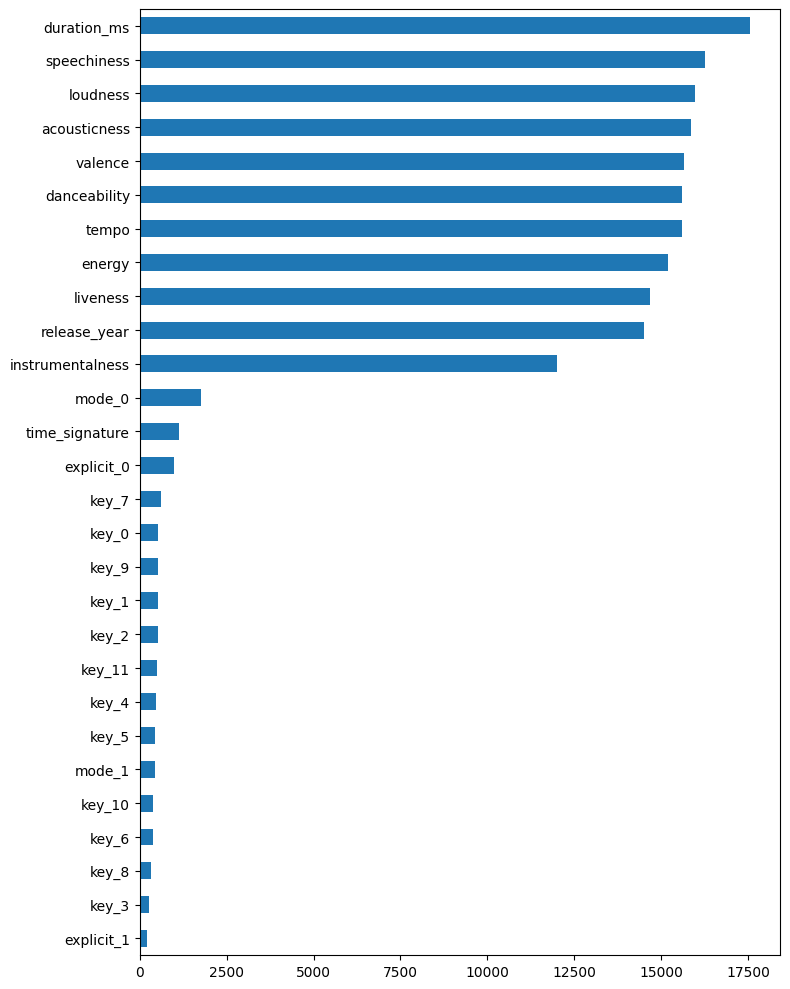

In [ ]:
feat_imp = pd.Series(lgbm_tuned.feature_importances_, index=X_train.columns)
feat_imp.sort_values().plot(kind='barh', figsize=(8,10))
plt.tight_layout()
plt.show()

In [ ]:
cols_to_drop = ['mode_0', 'mode_1', 'time_signature', 'explicit_0', 'explicit_1',
                'key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 
                'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11']

X_clean = X_train.drop(columns=cols_to_drop)
X_test_clean = X_test.drop(columns=cols_to_drop)

lgbm_clean = LGBMClassifier(
    class_weight='balanced',
    n_estimators=1000,
    random_state=42,
    n_jobs=-1
)
lgbm_clean.fit(X_clean, y_train)
print(classification_report(y_test, lgbm_clean.predict(X_test_clean)))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2583
[LightGBM] [Info] Number of data points in the train set: 224144, number of used features: 11
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
              precision    recall  f1-score   support

        High       0.44      0.63      0.52     11233
         Low       0.48      0.67      0.56     14350
      Medium       0.69      0.45      0.55     30454

    accuracy                           0.54     56037
   macro avg       0.54      0.58      0.54     56037
weighted avg       0.58      0.54      0.54     56037



In [ ]:
import lightgbm as lgb

In [ ]:
import lightgbm as lgb

lgbm_final = lgb.LGBMClassifier(
    class_weight='balanced',
    n_estimators=1000,
    learning_rate=0.05,
    random_state=42,
    n_jobs=-1
)

callbacks = [lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(period=100)]

lgbm_final.fit(
    X_clean, y_train,
    eval_set=[(X_test_clean, y_test)],
    callbacks=callbacks
)

print(f"Best iteration: {lgbm_final.best_iteration_}")
print(classification_report(y_test, lgbm_final.predict(X_test_clean)))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2583
[LightGBM] [Info] Number of data points in the train set: 224144, number of used features: 11
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Training until validation scores don't improve for 50 rounds
[100]	valid_0's multi_logloss: 0.92514
[200]	valid_0's multi_logloss: 0.917091
[300]	valid_0's multi_logloss: 0.91299
[400]	valid_0's multi_logloss: 0.910289
[500]	valid_0's multi_logloss: 0.908008
[600]	valid_0's multi_logloss: 0.906402
[700]	valid_0's multi_logloss: 0.905165
[800]	valid_0's multi_logloss: 0.904069
[900]	valid_0's multi_logloss: 0.902959
[1000]	valid_0's multi_logloss: 0.901968
Did not meet early stopp

In [ ]:
# Your best model
rf_final = RandomForestClassifier(
    class_weight='balanced', 
    n_estimators=300, 
    random_state=42,
    n_jobs=-1
)
rf_final.fit(X_clean, y_train)
print(classification_report(y_test, rf_final.predict(X_test_clean)))

              precision    recall  f1-score   support

        High       0.62      0.33      0.43     11233
         Low       0.64      0.33      0.44     14350
      Medium       0.61      0.86      0.71     30454

    accuracy                           0.62     56037
   macro avg       0.62      0.51      0.53     56037
weighted avg       0.62      0.62      0.59     56037



In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

xgb = XGBClassifier(
    scale_pos_weight=1,
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    n_jobs=-1,
    random_state=42,
    eval_metric='mlogloss'
)
xgb.fit(X_clean, y_train_enc)
print(classification_report(y_test_enc, xgb.predict(X_test_clean), 
      target_names=le.classes_))

/opt/anaconda3/envs/FM/lib/python3.10/site-packages/xgboost/training.py:200: UserWarning: [16:26:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

        High       0.61      0.36      0.45     11233
         Low       0.62      0.35      0.45     14350
      Medium       0.62      0.84      0.71     30454

    accuracy                           0.62     56037
   macro avg       0.61      0.52      0.54     56037
weighted avg       0.62      0.62      0.59     56037



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(
    class_weight='balanced',
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
et.fit(X_clean, y_train)
print(classification_report(y_test, et.predict(X_test_clean)))

              precision    recall  f1-score   support

        High       0.62      0.34      0.44     11233
         Low       0.64      0.33      0.43     14350
      Medium       0.61      0.86      0.71     30454

    accuracy                           0.62     56037
   macro avg       0.62      0.51      0.53     56037
weighted avg       0.62      0.62      0.59     56037



In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(class_weight='balanced', n_estimators=300, random_state=42)),
        ('lgbm', lgb.LGBMClassifier(class_weight='balanced', n_estimators=500, random_state=42)),
        ('et', ExtraTreesClassifier(class_weight='balanced', n_estimators=300, random_state=42))
    ],
    voting='soft',
    n_jobs=-1
)
ensemble.fit(X_clean, y_train)
print(classification_report(y_test, ensemble.predict(X_test_clean)))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000683 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2583
[LightGBM] [Info] Number of data points in the train set: 224144, number of used features: 11
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
              precision    recall  f1-score   support

        High       0.57      0.44      0.49     11233
         Low       0.58      0.47      0.52     14350
      Medium       0.64      0.75      0.69     30454

    accuracy                           0.62     56037
   macro avg       0.60      0.55      0.57     56037
weighted avg       0.61      0.62      0.61     56037



### Unsupervised

/opt/anaconda3/envs/FM/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/opt/anaconda3/envs/FM/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/opt/anaconda3/envs/FM/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


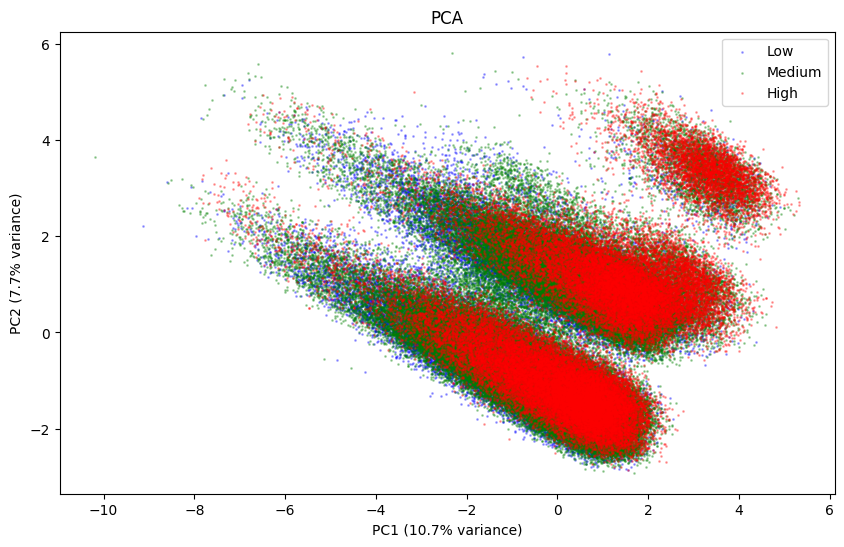

Total variance explained by 2 components: 0.18


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Scale first
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(10,6))
colors = {'Low':'blue', 'Medium':'green', 'High':'red'}
for label in ['Low', 'Medium', 'High']:
    mask = y_train == label
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                c=colors[label], label=label, alpha=0.3, s=1)
plt.legend()
plt.title('PCA')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.show()

print(f"Total variance explained by 2 components: {pca.explained_variance_ratio_.sum():.2f}")

In [ ]:
# Find what's in that high cluster
df_train = X_train.copy()
df_train['PC1'] = X_pca[:, 0]
df_train['PC2'] = X_pca[:, 1]
df_train['label'] = y_train.values

# Isolate the bottom-right cluster
cluster_high = df_train[(df_train['PC1'] > 2) & (df_train['PC2'] < 1)]
print(cluster_high['label'].value_counts())
print(cluster_high[['release_year', 'loudness', 'acousticness', 'instrumentalness']].describe())

label
Medium    5453
High      3573
Low       1378
Name: count, dtype: int64
       release_year      loudness  acousticness  instrumentalness
count  10404.000000  10404.000000  10404.000000      10404.000000
mean    2011.365436     -4.626836      0.094423          0.011022
std        7.245139      1.709188      0.113343          0.064561
min     1990.000000    -14.659000      0.000001          0.000000
25%     2007.000000     -5.682000      0.012800          0.000000
50%     2013.000000     -4.529500      0.053300          0.000000
75%     2017.000000     -3.488000      0.136000          0.000115
max     2021.000000      1.585000      0.818000          0.907000


In [ ]:
features_4 = ['release_year', 'loudness', 'acousticness', 'instrumentalness']

X_train_4 = X_train[features_4]
X_test_4 = X_test[features_4]

rf_4 = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
rf_4.fit(X_train_4, y_train)
print(classification_report(y_test, rf_4.predict(X_test_4)))

              precision    recall  f1-score   support

        High       0.50      0.32      0.39     11233
         Low       0.48      0.32      0.39     14350
      Medium       0.59      0.76      0.67     30454

    accuracy                           0.56     56037
   macro avg       0.52      0.47      0.48     56037
weighted avg       0.54      0.56      0.54     56037



In [ ]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    class_weights={'Low': 1.3, 'Medium': 0.6, 'High': 1.66},
    random_seed=42,
    verbose=100
)
cat.fit(X_train, y_train)
print(classification_report(y_test, cat.predict(X_test)))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [300, 500, 700],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

search = RandomizedSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
    param_grid,
    n_iter=20,
    cv=3,
    scoring='f1_weighted',
    random_state=42,
    verbose=2
)
search.fit(X_train, y_train)
print(f"Best params: {search.best_params_}")
print(classification_report(y_test, search.best_estimator_.predict(X_test)))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=700; total time=  16.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=700; total time=  16.8s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=700; total time=  16.9s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   6.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   6.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   6.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   6.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   6.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   6.5s
[CV] END max_depth=None, min_s

In [ ]:
import joblib

In [ ]:
joblib.dump(search.best_estimator_, 'best_rf_model.pkl')

['best_rf_model.pkl']

In [ ]:
joblib.dump(X_train.columns.tolist(), 'model_columns.pkl') 

['model_columns.pkl']

duration_ms         12.977107
speechiness          4.030936
instrumentalness     3.176885
liveness             2.131026
acousticness         0.632190
tempo                0.402275
release_year         0.020988
valence             -0.098714
danceability        -0.389755
energy              -0.446671
loudness            -1.683192
dtype: float64


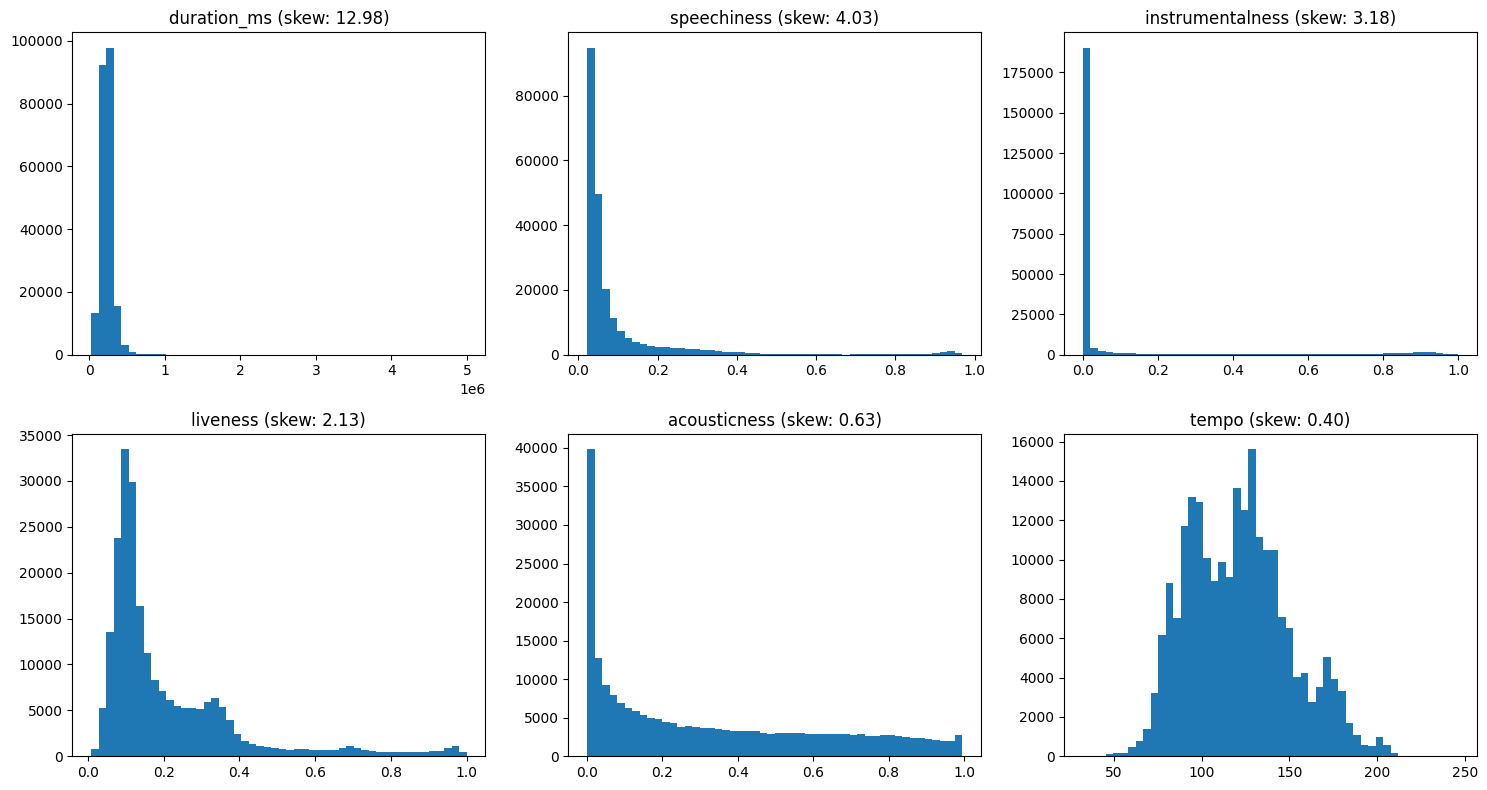

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Check skewness of numeric features
numeric_features = ['duration_ms', 'danceability', 'energy', 'loudness', 
                    'speechiness', 'acousticness', 'instrumentalness', 
                    'liveness', 'valence', 'tempo', 'release_year']

skewness = X_train[numeric_features].skew().sort_values(ascending=False)
print(skewness)

# Visualize the most skewed ones
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

most_skewed = skewness.head(6).index
for i, col in enumerate(most_skewed):
    axes[i].hist(X_train[col], bins=50)
    axes[i].set_title(f'{col} (skew: {skewness[col]:.2f})')
plt.tight_layout()
plt.show()

In [46]:
import numpy as np

# Only these 4 need transformation
features_to_log = ['duration_ms', 'speechiness', 'instrumentalness', 'liveness']

X_train_log = X_train.copy()
X_test_log = X_test.copy()

for col in features_to_log:
    X_train_log[col] = np.log1p(X_train_log[col])
    X_test_log[col] = np.log1p(X_test_log[col])

# Verify skewness improved
print("Skewness after transformation:")
print(X_train_log[features_to_log].skew())

# Retrain with best params from grid search
rf_log = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=700,
    min_samples_split=10,
    min_samples_leaf=1,
    max_depth=30,
    random_state=42,
    n_jobs=-1
)
rf_log.fit(X_train_log, y_train)
print(classification_report(y_test, rf_log.predict(X_test_log)))

Skewness after transformation:
duration_ms        -0.721938
speechiness         3.403780
instrumentalness    3.053508
liveness            1.733020
dtype: float64


NameError: name 'RandomForestClassifier' is not defined

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(
    class_weight='balanced',
    n_estimators=700,
    min_samples_split=10,
    min_samples_leaf=1,
    max_depth=30,
    random_state=42,
    n_jobs=-1
)

et.fit(X_train, y_train)
print(classification_report(y_test, et.predict(X_test)))

              precision    recall  f1-score   support

        High       0.49      0.56      0.52     11233
         Low       0.50      0.61      0.55     14350
      Medium       0.67      0.56      0.61     30454

    accuracy                           0.57     56037
   macro avg       0.55      0.58      0.56     56037
weighted avg       0.59      0.57      0.58     56037



In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, ExtraTreesClassifier
import lightgbm as lgb

ensemble = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(
            class_weight='balanced', n_estimators=700,
            min_samples_split=10, max_depth=30,
            random_state=42, n_jobs=-1)),
        ('et', ExtraTreesClassifier(
            class_weight='balanced', n_estimators=700,
            min_samples_split=10, max_depth=30,
            random_state=42, n_jobs=-1)),
        ('lgbm', lgb.LGBMClassifier(
            class_weight='balanced', n_estimators=500,
            random_state=42, n_jobs=-1))
    ],
    voting='soft',  # uses probabilities, more nuanced than hard voting
    n_jobs=-1
)

ensemble.fit(X_train, y_train)
print(classification_report(y_test, ensemble.predict(X_test)))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006388 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2620
[LightGBM] [Info] Number of data points in the train set: 224144, number of used features: 28
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
              precision    recall  f1-score   support

        High       0.50      0.56      0.53     11233
         Low       0.52      0.63      0.57     14350
      Medium       0.67      0.58      0.62     30454

    accuracy                           0.59     56037
   macro avg       0.56      0.59      0.57     56037
weighted avg       0.60      0.59      0.59     56037



In [ ]:
rf_clean = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=700,
    min_samples_split=10,
    min_samples_leaf=1,
    max_depth=30,
    random_state=42,
    n_jobs=-1
)

rf_clean.fit(X_clean, y_train)
print(classification_report(y_test, rf_clean.predict(X_test_clean)))

              precision    recall  f1-score   support

        High       0.56      0.45      0.50     11233
         Low       0.56      0.51      0.53     14350
      Medium       0.64      0.72      0.68     30454

    accuracy                           0.61     56037
   macro avg       0.59      0.56      0.57     56037
weighted avg       0.61      0.61      0.61     56037



In [ ]:
joblib.dump(rf_clean, 'best_rf_model_clean.pkl')
joblib.dump(X_clean.columns.tolist(), 'model_columns_clean.pkl')

['model_columns_clean.pkl']

In [ ]:
X_clean.columns

Index(['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'release_year'],
      dtype='object')

In [ ]:
# Option 1: Try hard voting (majority rule)
ensemble_hard = VotingClassifier(
    estimators=[('rf', rf), ('et', et), ('lgbm', lgbm)],
    voting='hard',  # Each model gets one vote
    n_jobs=-1
)

# Option 2: Weighted soft voting
ensemble_weighted = VotingClassifier(
    estimators=[('rf', rf), ('et', et), ('lgbm', lgbm)],
    voting='soft',
    weights=[2, 1, 1],  # Give RF more influence
    n_jobs=-1
)

# Option 3: Stacking (more sophisticated)
from sklearn.ensemble import StackingClassifier

stacking = StackingClassifier(
    estimators=[('rf', rf), ('et', et), ('lgbm', lgbm)],
    final_estimator=RandomForestClassifier(n_estimators=100),
    cv=5
)

In [49]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, ExtraTreesClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
import numpy as np

# Define base models
rf = RandomForestClassifier(
    class_weight='balanced', 
    n_estimators=700,
    min_samples_split=10, 
    max_depth=30,
    random_state=42, 
    n_jobs=-1
)

et = ExtraTreesClassifier(
    class_weight='balanced', 
    n_estimators=700,
    min_samples_split=10, 
    max_depth=30,
    random_state=42, 
    n_jobs=-1
)

lgbm = lgb.LGBMClassifier(
    class_weight='balanced', 
    n_estimators=500,
    random_state=42, 
    n_jobs=-1,
    verbose=-1  # Suppress LightGBM warnings
)

# Hard Voting Ensemble
ensemble_hard = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('et', et),
        ('lgbm', lgbm)
    ],
    voting='hard',  # Each model gets one vote
    n_jobs=-1
)

# Train and evaluate
print("Training Hard Voting Ensemble...")
ensemble_hard.fit(X_train, y_train)
y_pred_hard = ensemble_hard.predict(X_test)
print("\nHard Voting Ensemble Results:")
print(classification_report(y_test, y_pred_hard))

Training Hard Voting Ensemble...


KeyboardInterrupt: 

In [50]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, ExtraTreesClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
import numpy as np

# Define base models
rf = RandomForestClassifier(
    class_weight='balanced', 
    n_estimators=700,
    min_samples_split=10, 
    max_depth=30,
    random_state=42, 
    n_jobs=-1
)

et = ExtraTreesClassifier(
    class_weight='balanced', 
    n_estimators=700,
    min_samples_split=10, 
    max_depth=30,
    random_state=42, 
    n_jobs=-1
)

lgbm = lgb.LGBMClassifier(
    class_weight='balanced', 
    n_estimators=500,
    random_state=42, 
    n_jobs=-1,
    verbose=-1  # Suppress LightGBM warnings
)


In [ ]:
# Check if RF and ET are actually contributing
rf_pred = rf.predict(X_test)
et_pred = et.predict(X_test)
lgbm_pred = lgbm.predict(X_test)

print("RF Accuracy:", accuracy_score(y_test, rf_pred))
print("ET Accuracy:", accuracy_score(y_test, et_pred))  
print("LGBM Accuracy:", accuracy_score(y_test, lgbm_pred))

# See where they agree/disagree
agreement = (rf_pred == et_pred) & (et_pred == lgbm_pred)
print(f"All three agree: {agreement.mean():.2%} of samples")

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# First, make sure your models are defined (as you already have)
rf = RandomForestClassifier(
    class_weight='balanced', 
    n_estimators=700,
    min_samples_split=10, 
    max_depth=30,
    random_state=42, 
    n_jobs=-1
)

et = ExtraTreesClassifier(
    class_weight='balanced', 
    n_estimators=700,
    min_samples_split=10, 
    max_depth=30,
    random_state=42, 
    n_jobs=-1
)

lgbm = lgb.LGBMClassifier(
    class_weight='balanced', 
    n_estimators=500,
    random_state=42, 
    n_jobs=-1,
    verbose=-1
)

# IMPORTANT: Fit the models first!
print("Fitting individual models...")
rf.fit(X_train, y_train)
et.fit(X_train, y_train)
lgbm.fit(X_train, y_train)

# Now check individual performance
print("\n" + "="*50)
print("INDIVIDUAL MODEL PERFORMANCE")
print("="*50)

rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(classification_report(y_test, rf_pred))

et_pred = et.predict(X_test)
et_acc = accuracy_score(y_test, et_pred)
print(f"\nExtra Trees Accuracy: {et_acc:.4f}")
print(classification_report(y_test, et_pred))

lgbm_pred = lgbm.predict(X_test)
lgbm_acc = accuracy_score(y_test, lgbm_pred)
print(f"\nLightGBM Accuracy: {lgbm_acc:.4f}")
print(classification_report(y_test, lgbm_pred))

# See where they agree/disagree
agreement = (rf_pred == et_pred) & (et_pred == lgbm_pred)
print(f"\n{'='*50}")
print(f"All three models agree on: {agreement.mean():.2%} of samples")

# When they disagree, who's usually right?
disagreement_mask = ~agreement
if disagreement_mask.sum() > 0:
    y_test_disagree = y_test[disagreement_mask]
    
    rf_correct_on_disagree = (rf_pred[disagreement_mask] == y_test_disagree).mean()
    et_correct_on_disagree = (et_pred[disagreement_mask] == y_test_disagree).mean()
    lgbm_correct_on_disagree = (lgbm_pred[disagreement_mask] == y_test_disagree).mean()
    
    print(f"\nWhen models disagree ({disagreement_mask.mean():.2%} of samples):")
    print(f"  RF correct: {rf_correct_on_disagree:.2%}")
    print(f"  ET correct: {et_correct_on_disagree:.2%}")
    print(f"  LGBM correct: {lgbm_correct_on_disagree:.2%}")

# Now try the weighted ensemble with fitted models
print("\n" + "="*50)
print("WEIGHTED ENSEMBLE (with fitted models)")
print("="*50)

# Try different weight combinations
weight_options = [
    [2, 1, 1],  # RF gets more weight
    [1, 2, 1],  # ET gets more weight  
    [1, 1, 2],  # LGBM gets more weight
    [2, 2, 1],  # RF and ET emphasized
    [3, 2, 1],  # RF heavily weighted
    [1, 1, 3],  # LGBM heavily weighted
]

best_score = 0
best_weights = None
best_weighted_ensemble = None

for weights in weight_options:
    ensemble_weighted = VotingClassifier(
        estimators=[
            ('rf', rf),
            ('et', et),
            ('lgbm', lgbm)
        ],
        voting='hard',
        weights=weights,
        n_jobs=-1
    )
    
    # Note: VotingClassifier with pre-fitted estimators will refit them
    # To avoid refitting, you'd need to use a different approach
    ensemble_weighted.fit(X_train, y_train)
    score = ensemble_weighted.score(X_test, y_test)
    
    print(f"Weights {weights}: Accuracy = {score:.4f}")
    
    if score > best_score:
        best_score = score
        best_weights = weights
        best_weighted_ensemble = ensemble_weighted

print(f"\nBest weights: {best_weights} (Accuracy: {best_score:.4f})")
print("\nBest Weighted Ensemble Results:")
y_pred_weighted = best_weighted_ensemble.predict(X_test)
print(classification_report(y_test, y_pred_weighted))

Fitting individual models...

INDIVIDUAL MODEL PERFORMANCE
Random Forest Accuracy: 0.6120
              precision    recall  f1-score   support

        High       0.56      0.47      0.51     11233
         Low       0.55      0.52      0.54     14350
      Medium       0.65      0.71      0.68     30454

    accuracy                           0.61     56037
   macro avg       0.59      0.57      0.58     56037
weighted avg       0.61      0.61      0.61     56037


Extra Trees Accuracy: 0.5740
              precision    recall  f1-score   support

        High       0.49      0.56      0.52     11233
         Low       0.50      0.61      0.55     14350
      Medium       0.67      0.56      0.61     30454

    accuracy                           0.57     56037
   macro avg       0.55      0.58      0.56     56037
weighted avg       0.59      0.57      0.58     56037


LightGBM Accuracy: 0.5495
              precision    recall  f1-score   support

        High       0.45      0.63   

: 

In [47]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [51]:
from sklearn.ensemble import VotingClassifier

# Give RF more weight since it's most accurate when models disagree
ensemble_final = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('et', et),
        ('lgbm', lgbm)
    ],
    voting='soft',  # Use probabilities for nuance
    weights=[3, 1, 1],  # RF gets 3x weight
    n_jobs=-1
)

ensemble_final.fit(X_train, y_train)
print(classification_report(y_test, ensemble_final.predict(X_test)))

              precision    recall  f1-score   support

        High       0.53      0.52      0.53     11233
         Low       0.52      0.58      0.55     14350
      Medium       0.66      0.63      0.65     30454

    accuracy                           0.60     56037
   macro avg       0.57      0.58      0.57     56037
weighted avg       0.60      0.60      0.60     56037



In [56]:
import joblib

# Save the trained ensemble model
joblib.dump(ensemble_final, 'ensemble_28.pkl')

['ensemble_28.pkl']

Ensemble Learning 28 Features:

                  precision    recall  f1-score   support

        High       0.53      0.52      0.53     11233
         Low       0.52      0.58      0.55     14350
      Medium       0.66      0.63      0.65     30454

    accuracy                           0.60     56037
   macro avg       0.57      0.58      0.57     56037
weighted avg       0.60      0.60      0.60     56037

Optimized Random Forest 28 Features:

               precision    recall  f1-score   support

        High       0.56      0.45      0.50     11233
         Low       0.56      0.51      0.53     14350
      Medium       0.64      0.72      0.68     30454

    accuracy                           0.61     56037
   macro avg       0.59      0.56      0.57     56037
weighted avg       0.61      0.61      0.61     56037

Ensemble On 11 Features: 

               precision    recall  f1-score   support

        High       0.52      0.51      0.52     11233
         Low       0.52      0.59      0.55     14350
      Medium       0.66      0.63      0.65     30454

    accuracy                           0.60     56037
   macro avg       0.57      0.58      0.57     56037
weighted avg       0.60      0.60      0.60     56037

In [54]:
cols_to_drop = ['mode_0', 'mode_1', 'time_signature', 'explicit_0', 'explicit_1',
                'key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 
                'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11']

X_clean = X_train.drop(columns=cols_to_drop)
X_test_clean = X_test.drop(columns=cols_to_drop)

In [57]:
# Test if [2,1,1] gives you the best of both worlds
ensemble_11 = VotingClassifier(
    estimators=[('rf', rf), ('et', et), ('lgbm', lgbm)],
    voting='soft',
    weights=[2, 1, 1],  # RF gets double weight (less than 3x)
    n_jobs=-1
)

ensemble_11.fit(X_clean, y_train)
print(classification_report(y_test, ensemble_11.predict(X_test_clean)))

              precision    recall  f1-score   support

        High       0.52      0.51      0.52     11233
         Low       0.52      0.59      0.55     14350
      Medium       0.66      0.63      0.65     30454

    accuracy                           0.60     56037
   macro avg       0.57      0.58      0.57     56037
weighted avg       0.60      0.60      0.60     56037



In [58]:
import joblib

# Save the trained ensemble model
joblib.dump(ensemble_11, 'ensemble_11_clean.pkl')

['ensemble_11_clean.pkl']

In [67]:
import joblib
import pandas as pd
import numpy as np

# Load the model and feature columns
print("📂 Loading rf_28 model...")
rf_28 = joblib.load('../models/rf_28.pkl')
feature_cols = joblib.load('../models/model_columns.pkl')

print(f"✅ Model loaded successfully!")
print(f"📊 Model type: {type(rf_28).__name__}")
print(f"🔢 Features expected: {len(feature_cols)}")
print(f"📋 First 5 features: {feature_cols[:5]}")

# Create a test sample (using realistic values)
test_song = {
    'duration_ms': 210000,
    'danceability': 0.75,
    'energy': 0.80,
    'loudness': -5.2,
    'speechiness': 0.05,
    'acousticness': 0.10,
    'instrumentalness': 0.001,
    'liveness': 0.15,
    'valence': 0.60,
    'tempo': 120.0,
    'key': 5,
    'mode': 1,
    'time_signature': 4,
    'release_year': 2023,
    'explicit': 0
}

# Note: rf_28 expects one-hot encoded features
# You'll need to recreate the full feature vector
print("\n🔄 Preparing features...")

# Create a dataframe with the base features
df_test = pd.DataFrame([test_song])

# One-hot encode key and mode
df_test_encoded = pd.get_dummies(df_test, columns=['key', 'mode'])

# Create explicit OHE columns
df_test_encoded['explicit_0'] = (df_test['explicit'] == 0).astype(int)
df_test_encoded['explicit_1'] = (df_test['explicit'] == 1).astype(int)

# Reindex to match training columns
X_test = df_test_encoded.reindex(columns=feature_cols, fill_value=0)

print(f"✅ Feature shape: {X_test.shape}")

# Make prediction
print("\n🔮 Making prediction...")
prediction = rf_28.predict(X_test)[0]
probabilities = rf_28.predict_proba(X_test)[0]

# Get class names (if available)
try:
    class_names = rf_28.classes_
except:
    class_names = ['High', 'Low', 'Medium']  # Default order

print("\n" + "="*50)
print("🎵 TEST RESULTS")
print("="*50)
print(f"Predicted popularity bucket: {prediction}")
print("\nProbabilities:")
for i, prob in enumerate(probabilities):
    print(f"  {class_names[i]}: {prob:.2%}")

# Try a few more test cases
print("\n" + "="*50)
print("🔄 TESTING DIFFERENT PROFILES")
print("="*50)

test_profiles = [
    {
        'name': 'Potential Hit',
        'features': {
            'duration_ms': 180000,
            'danceability': 0.85,
            'energy': 0.90,
            'loudness': -3.5,
            'speechiness': 0.04,
            'acousticness': 0.05,
            'instrumentalness': 0.0001,
            'liveness': 0.10,
            'valence': 0.80,
            'tempo': 125.0,
            'key': 1,
            'mode': 1,
            'time_signature': 4,
            'release_year': 2024,
            'explicit': 0
        }
    },
    {
        'name': 'Niche Track',
        'features': {
            'duration_ms': 300000,
            'danceability': 0.40,
            'energy': 0.30,
            'loudness': -15.0,
            'speechiness': 0.02,
            'acousticness': 0.90,
            'instrumentalness': 0.80,
            'liveness': 0.70,
            'valence': 0.20,
            'tempo': 80.0,
            'key': 9,
            'mode': 0,
            'time_signature': 3,
            'release_year': 1995,
            'explicit': 0
        }
    }
]

for profile in test_profiles:
    print(f"\n📀 Testing: {profile['name']}")
    
    # Process features
    df_temp = pd.DataFrame([profile['features']])
    df_temp_encoded = pd.get_dummies(df_temp, columns=['key', 'mode'])
    df_temp_encoded['explicit_0'] = (df_temp['explicit'] == 0).astype(int)
    df_temp_encoded['explicit_1'] = (df_temp['explicit'] == 1).astype(int)
    X_temp = df_temp_encoded.reindex(columns=feature_cols, fill_value=0)
    
    # Predict
    pred = rf_28.predict(X_temp)[0]
    prob = rf_28.predict_proba(X_temp)[0]
    
    print(f"  Prediction: {pred}")
    print(f"  Confidence: High={prob[0]:.1%}, Low={prob[1]:.1%}, Medium={prob[2]:.1%}")

📂 Loading rf_28 model...
✅ Model loaded successfully!
📊 Model type: RandomForestClassifier
🔢 Features expected: 28
📋 First 5 features: ['key_0', 'key_1', 'key_2', 'key_3', 'key_4']

🔄 Preparing features...
✅ Feature shape: (1, 28)

🔮 Making prediction...

🎵 TEST RESULTS
Predicted popularity bucket: High

Probabilities:
  High: 76.47%
  Low: 7.99%
  Medium: 15.54%

🔄 TESTING DIFFERENT PROFILES

📀 Testing: Potential Hit
  Prediction: High
  Confidence: High=78.2%, Low=6.2%, Medium=15.7%

📀 Testing: Niche Track
  Prediction: Medium
  Confidence: High=7.0%, Low=44.6%, Medium=48.5%


In [65]:
import joblib
import pandas as pd
import os

# Check current working directory
print(f"📁 Current working directory: {os.getcwd()}")
print(f"📂 Contents of current directory: {os.listdir('.')}")

# Option 1: Relative path (if running from project root)
print("\n📂 Loading rf_28 model...")
rf_28 = joblib.load('../models/rf_28.pkl')
feature_cols = joblib.load('../models/model_columns.pkl')

# Option 2: If you're in a different directory, use full relative path
# rf_28 = joblib.load('../models/rf_28.pkl')
# feature_cols = joblib.load('../models/model_columns.pkl')

# Option 3: If you want to be safe, construct the path
# model_path = os.path.join('models', 'rf_28.pkl')
# rf_28 = joblib.load(model_path)

print(f"✅ Model loaded successfully!")
print(f"📊 Model type: {type(rf_28).__name__}")

📁 Current working directory: /Users/ruhanirekhi/Documents/GitHub/song-popularity-prediction/EDA-Scripts
📂 Contents of current directory: ['final_df.ipynb', 'data_cleaning1.ipynb', 'eda-artists-csv.ipynb', 'data-cleaning.ipynb']

📂 Loading rf_28 model...
✅ Model loaded successfully!
📊 Model type: RandomForestClassifier


In [68]:
final_df[['release_year']].max()


release_year    2021
dtype: int32

In [69]:
X_clean.columns

Index(['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'release_year'],
      dtype='object')

In [71]:
filtered_df

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
0,100,198082,1,0.677,0.696,0,-6.181,1,0.1190,0.321000,0.000000,0.420,0.4640,90.030,4,2021
1,99,242014,1,0.585,0.436,10,-8.761,1,0.0601,0.721000,0.000013,0.105,0.1320,143.874,4,2021
2,98,132780,0,0.778,0.695,4,-6.865,0,0.0913,0.175000,0.000000,0.150,0.4720,149.996,4,2021
3,97,160191,0,0.653,0.524,11,-9.016,0,0.0502,0.112000,0.000000,0.203,0.5530,83.970,4,2020
4,97,215627,1,0.680,0.826,0,-5.487,1,0.0309,0.021200,0.000012,0.543,0.6440,118.051,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280176,1,230400,0,0.496,0.950,4,-7.519,0,0.0450,0.008950,0.879000,0.179,0.5040,125.003,4,2018
280177,1,192990,0,0.324,0.717,6,-9.873,0,0.0388,0.242000,0.930000,0.136,0.9620,200.062,4,2018
280178,1,229651,0,0.823,0.462,4,-6.824,1,0.0370,0.027700,0.000107,0.108,0.4760,124.023,4,2012
280179,1,265846,0,0.655,0.914,2,-6.533,1,0.0476,0.000056,0.515000,0.118,0.0329,129.989,4,2018
